In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os



In [20]:
print(os.popen('ls ../data').read())

size_2021-06-10-10-42-20
size_2021-06-10-10-46-37
size_2021-06-10-11-13-43
size_2021-06-10-11-15-48



In [21]:
#path='/home/juan/Programs/ALF/pyALF/Scripts/ALF_data'
Options=['SpinZ_tauJ','SpinXY_tauJ','SpinT_tauJ','Green_tauJ','Den_tauJ','Current_tauJ']
Options2=['Kin_scalJ','Ener_scalJ','Kin_X_scalJ','Part_scalJ', 'Pot_scalJ']
Options3=['SpinZ_','SpinXY_','SpinT_','Green_','Den_','Current_']
RK=['R','K']
LATSZ=[6,8,10]
path_pr='/Users/jfmv/Documents/Proyectos/QMC_tests/H_current_repulsive/data/'
#path_pr='/home/juan/Documents/Projects/QMC_tests/H_current_attractive/data/'
diri=input()
print(diri[:-19])
path_pr=path_pr+diri+'/'+diri[:-19]
Nsize=4


size_2021-06-10-11-15-48
size_


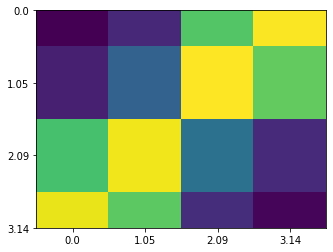

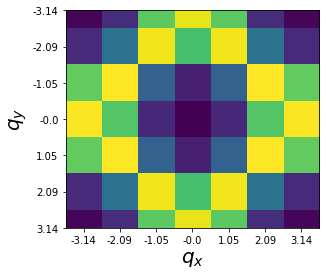

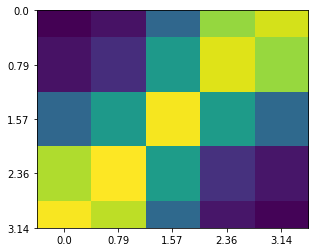

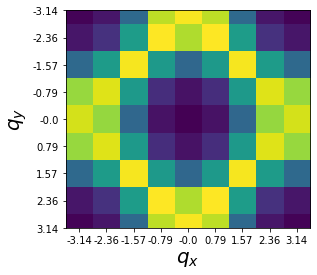

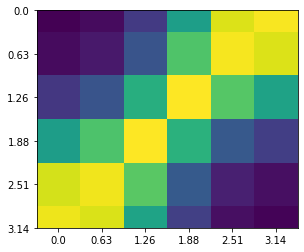

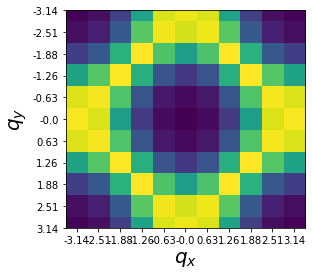

In [22]:


val_list=[]
err_list=[]
sign_list=[]
errsign_list=[]


for i in LATSZ:
    path=path_pr+str(i)+'/'
    os.system('touch '+path+'get_names.sh')
    filename=path+'get_names.sh'
    f=open(filename, 'w')
    f.writelines(["#!/bin/bash \n", " ls -l "+path+"  | grep '^d'|grep '"+Options3[3]+"' | awk '{print $NF}' > temp.tmp"])
    f.close()
    os.system("chmod u+x "+filename)
    os.system("cd "+path+" ;"+"./get_names.sh")

    filename=path+'temp.tmp'
    f=open(filename, 'r')
    lines=[]
    for line in f:
        lines.append(line.strip())
        #print(line,'s')

    R0=lines.pop()
    f.close()
    os.system('rm '+path+'get_names.sh')
    os.system('rm '+path+'temp.tmp')

    #coords from the titles of the directories
    pairs= np.array([i.split('_')[1:] for i in lines], dtype=np.float)
    xx=pairs[:,0]
    yy=pairs[:,1]
    x=list(set(list(xx)))
    y=list(set(list(yy)))
    x.sort()
    y.sort()
    xpl=[round(i,3) for i in x]
    ypl=[round(i,3) for i in y]

    NL=int(np.sqrt(np.size(xx)))

    #print(lines)
    #print(R0)

    Obs_T=[]
    Err_T=[]
    Proxy=[]
    Proxy_err=[]
    for line in lines:
        #filename=path+line+'/g_dat'
        filename=path+line+'/g_'+line[-9:]
        f=open(filename, 'r')

        li=[]
        for lin in f:
            l=[]
            l=[i for i in (lin.strip()).split()]
            li.append(l)
            #print(line,'s')
        #print(li[0])
        
        #getting the first line which contains general info:
        Nimtimes=int(li[0][0])
        EffectiveNbins=int(li[0][1])
        beta=float(li[0][2])
        Norbitals=int(li[0][3])
        #channel=li[0][4]

        #getting the contents of g_dat in array form
        tau=np.array(li[1:], dtype=np.float)[:,0]
        mean=np.array(li[1:], dtype=np.float)[:,1]
        err=np.array(li[1:], dtype=np.float)[:,2]
        Obs_T.append(mean)
        Err_T.append(err)

        ind_half_time=np.where(tau==beta/2)[0][0]
        Proxy.append(mean[ind_half_time])
        Proxy_err.append(err[ind_half_time])

    A=np.reshape(np.array(Proxy),[NL,NL])
    S=np.zeros([2*NL-1,2*NL-1])
    S[NL-1:,NL-1:]=A[:,:]
    S[:NL,NL-1:]=A[::-1,:]
    S[NL-1:,:NL]=A[:,::-1]
    S[:NL,:NL]=A[::-1,::-1]
    ###plots
    Npl=np.arange(NL)
    plt.imshow(A)
    plt.xticks(Npl,xpl)
    plt.yticks(Npl,ypl)
    plt.show()
     #Npl=np.arange(NL)
    plt.imshow(S)
    xxpl=[round(i,3) for i in np.array(list(-np.array(xpl[::-1]))+xpl[1:])]
    yypl=[round(i,3) for i in np.array(list(-np.array(ypl[::-1]))+ypl[1:])]
    NNpl=np.arange(2*NL-1)
    plt.xticks(NNpl,xxpl)
    plt.yticks(NNpl,yypl)
    plt.xlabel(r"$q_x $", size=20)
    plt.ylabel(r"$q_y$", size=20)
    plt.show()
    


    #print(np.reshape(xx,[NL,NL]))
    #print(np.reshape(yy,[NL,NL]))
    #print(np.reshape(xx,[NL,NL])[0,:]) #first index is the same x
    #print(np.reshape(yy,[NL,NL])[:,0]) #second index is the same y
    #plt.imshow(np.reshape(xx,[NL,NL]))
    #plt.show()


-0.666912 0.00714 1.0 0.0
Real... 6 x 6 ...beta= 6
kx... 0.0
-0.685998 0.009346 1.0 0.0
Real... 6 x 6 ...beta= 8
kx... 0.0
-0.681602 0.00423 1.0 0.0
Real... 8 x 8 ...beta= 10
kx... 0.0


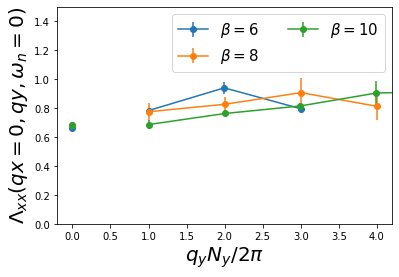

In [19]:


val_list=[]
err_list=[]
sign_list=[]
errsign_list=[]
rhos=[]
rhoerr=[]
for i in LATSZ:
    
    path=path_pr+str(i)+'/'
    
    ####################################
    ###################################
    ##################################
    #Scalar observables
    ###############################
    ###############################
    ###############################
    
    filename=path+Options2[2]
    f=open(filename, 'r')

    lines=[]
    for line in f:
        l=[]
        l=[i for i in (line.strip()).split()]
        lines.append(l)
        #print(line,'s')
    
    
    val=float(lines[2][3])
    val_err=float(lines[2][4])
    sign=float(lines[4][3])
    errsign=float(lines[4][4])
    
    val_list.append(val)
    err_list.append(val_err)
    sign_list.append(sign)
    errsign_list.append(errsign)

    print(val,val_err,sign,errsign)
    
    
    ############################
    ###########################
    ############################
    #Current Correlation Function
    ###############################
    #############################
    ###########################
    
    filename=path+Options[-1]+RK[1]
    f=open(filename, 'r')

    lines=[]
    for line in f:
        l=[]
        l=[float(i) for i in (line.strip()).split()]
        lines.append(l)
        #print(line,'s')

    ##processing coordinates
    xx=np.array(lines)[:,0]
    yy=np.array(lines)[:,1]
    x=list(set(list(np.array(lines)[:,0])))
    y=list(set(list(np.array(lines)[:,1])))
    x.sort()
    y.sort()
    xpl=[round(i,2) for i in x]
    ypl=[round(i,2) for i in y]

    ## getting values if the correlation functions
    real=np.array(lines)[:,2]
    realerr=np.array(lines)[:,3]
    im=np.array(lines)[:,4]
    imerr=np.array(lines)[:,5]
    
    ###########################
    ###########################
    ##plots
    ##########################
    ##########################
    

    ###############################
    #real part
    print("Real...",NL,"x",NL,"...beta=",i)
    NL=int(np.sqrt(np.size(xx)))
    Npl=np.arange(NL)
    realsq=np.reshape(real,[NL,NL])
    realerrsq=np.reshape(realerr,[NL,NL])
    #plt.imshow(realsq.T)
    #plt.xticks(Npl,xpl)
    #plt.yticks(Npl,ypl)
    #plt.xlabel(r"$x$")
    #plt.ylabel(r"$y$")
    #plt.show()
    
    init=int(NL/2 )
    i_tr=int(NL/2 -1)
    print('kx...',xpl[i_tr])
    #realsq[i_tr,init]=-val
    #realerrsq[i_tr,init]=val_err
    plt.errorbar(np.array(ypl[init:])*NL/(2*np.pi),realsq[i_tr,init:],realerrsq[i_tr,init:], fmt='o-', label=r"$\beta=$"+str(i))
    #plt.errorbar(0,-val, val_err, fmt='o')
    plt.scatter(ypl[init-1],-val)
    rhos.append(-val-realsq[i_tr,init])
    rhoerr.append(np.sqrt(val_err**2 +realerrsq[i_tr,init]**2))
plt.ylim([0,1.5])
plt.legend(fontsize=15,ncol=2)
plt.xlim([-0.2,4.2])
plt.xlabel(r"$q_y N_y /2\pi$", size=20)
plt.ylabel(r"$\Lambda_{xx}(qx=0,qy,\omega_n =0)$", size=20)
plt.show()

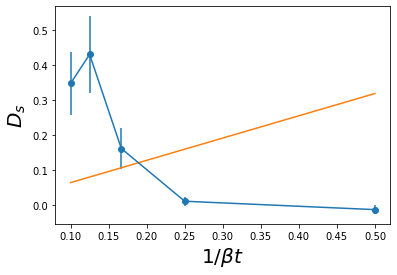

In [119]:
plt.errorbar(1/np.array(LATSZ),rhos, rhoerr , fmt='o-')
plt.xlabel(r"$1/\beta t$", size=20)
plt.ylabel(r"$ D_s$", size=20)


T=np.linspace(0.1,0.5,100)
plt.plot(T,2*T/np.pi)



-0.55396 0.003071 1.0 0.0
Real... 8 x 8
ky... 0.0
-0.581495 0.001445 1.0 0.0
Real... 8 x 8
ky... 0.0
-0.589714 0.00158 1.0 0.0
Real... 8 x 8
ky... 0.0
-0.594679 0.00097 1.0 0.0
Real... 8 x 8
ky... 0.0
-0.593078 0.001792 1.0 0.0
Real... 8 x 8
ky... 0.0


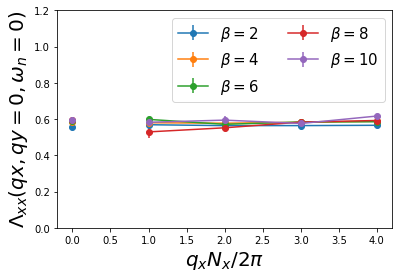

In [120]:


val_list=[]
err_list=[]
sign_list=[]
errsign_list=[]

for i in LATSZ:
    
    path=path_pr+str(i)+'/'
    
    ####################################
    ###################################
    ##################################
    #Scalar observables
    ###############################
    ###############################
    ###############################
    
    filename=path+Options2[2]
    f=open(filename, 'r')

    lines=[]
    for line in f:
        l=[]
        l=[i for i in (line.strip()).split()]
        lines.append(l)
        #print(line,'s')
    
    
    val=float(lines[2][3])
    val_err=float(lines[2][4])
    sign=float(lines[4][3])
    errsign=float(lines[4][4])
    
    val_list.append(val)
    err_list.append(val_err)
    sign_list.append(sign)
    errsign_list.append(errsign)

    print(val,val_err,sign,errsign)
    
    
    ############################
    ###########################
    ############################
    #Current Correlation Function
    ###############################
    #############################
    ###########################
    
    filename=path+Options[-1]+RK[1]
    f=open(filename, 'r')

    lines=[]
    for line in f:
        l=[]
        l=[float(i) for i in (line.strip()).split()]
        lines.append(l)
        #print(line,'s')

    ##processing coordinates
    xx=np.array(lines)[:,0]
    yy=np.array(lines)[:,1]
    x=list(set(list(np.array(lines)[:,0])))
    y=list(set(list(np.array(lines)[:,1])))
    x.sort()
    y.sort()
    xpl=[round(i,2) for i in x]
    ypl=[round(i,2) for i in y]

    ## getting values if the correlation functions
    real=np.array(lines)[:,2]
    realerr=np.array(lines)[:,3]
    im=np.array(lines)[:,4]
    imerr=np.array(lines)[:,5]
    
    ###########################
    ###########################
    ##plots
    ##########################
    ##########################
    

    ###############################
    #real part
    print("Real...",NL,"x",NL)
    NL=int(np.sqrt(np.size(xx)))
    Npl=np.arange(NL)
    realsq=np.reshape(real,[NL,NL])
    realerrsq=np.reshape(realerr,[NL,NL])
    #plt.imshow(realsq.T)
    #plt.xticks(Npl,xpl)
    #plt.yticks(Npl,ypl)
    #plt.xlabel(r"$x$")
    #plt.ylabel(r"$y$")
    #plt.show()
    
    init=int(NL/2 )
    j_tr=int(NL/2 -1)
    print('ky...',ypl[i_tr])
    #realsq[i_tr,init]=-val
    #realerrsq[i_tr,init]=val_err
    plt.errorbar(np.array(xpl[init:])*NL/(2*np.pi),realsq[init:,j_tr],realerrsq[init:,j_tr], fmt='o-', label=r"$\beta=$"+str(i))
    #plt.errorbar(0,-val, val_err, fmt='o')
    plt.scatter(0,-val)
plt.ylim([0,1.2])
plt.legend(fontsize=15, ncol=2)
plt.xlim([-0.2,4.2])
plt.xlabel(r"$q_x N_x /2\pi$", size=20)
plt.ylabel(r"$\Lambda_{xx}(qx,qy=0,\omega_n =0)$", size=20)
plt.show()
